In [1]:
import numpy as np
import temp as mz
maze = np.array([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 1, 0, 0], 
                 [0, 0, 1, 0, 0, 0, 1, 1, 0],
                 [0, 0, 1, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 1, 1, 1, 1, 1, 1, 0],
                 [0, 0, 0, 0, 0, 0, 1, 2, 0]])
#mz.draw_maze(maze)
env = mz.Maze(maze, minotaur_moves=4)


In [2]:
#print(env.transition_probabilities)
#print(env.show())

In [3]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);

In [4]:
list1 = ["1", "2"]
list2 = (1,2)
dict1 = {list2:5}
print(env.rewards.shape)
print(env.map[(0,0,6,6)])
print(env.rewards[60,:])
print(env.actions)


(2961, 5)
60
[   0. -100.    0. -100.    0.]
{0: (0, 0), 1: (0, -1), 2: (0, 1), 3: (-1, 0), 4: (1, 0)}


In [5]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0, 0, 6, 6);
path = env.simulate(start, policy, method);


In [6]:
print(path)

[(0, 0, 6, 6), (0, 0, 6, 6), (0, 0, 6, 6), (0, 0, 6, 6), (0, 0, 6, 6), (0, 0, 6, 6), (0, 0, 6, 5), (0, 0, 5, 5), (0, 0, 5, 4), (0, 0, 5, 4), (0, 0, 5, 5), (0, 0, 4, 5), (0, 0, 4, 6), (0, 0, 4, 6), (0, 0, 4, 6), (0, 0, 3, 6), (0, 0, 3, 7), (0, 0, 3, 7), (0, 0, 3, 6), (0, 0, 3, 7), (0, 0, 3, 6)]


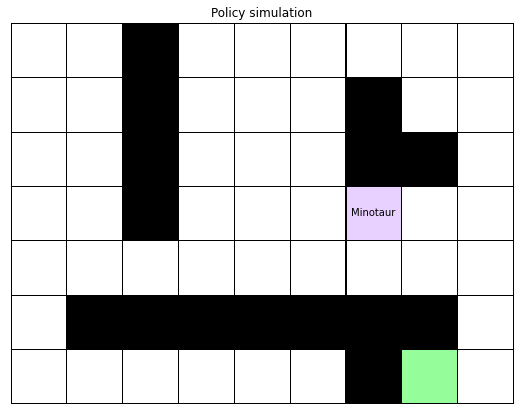

In [9]:
mz.animate_solution(maze, path)
#mz.draw_maze(maze)